In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
file=pd.read_csv('data.csv')

In [2]:
file.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [3]:
del file['date']

In [4]:
X= file[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']]

In [5]:
Y= file['price']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [7]:
from sklearn.linear_model import LinearRegression
linear_reg= LinearRegression(normalize=True)
linear_reg.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [8]:
print(linear_reg.intercept_)

5000038.874757184


In [9]:
coeff_df = pd.DataFrame(linear_reg.coef_, X.columns, columns=['Coefficient'])

In [10]:
coeff_df

,Coefficient
bedrooms,-55521.589262
bathrooms,43429.642599
sqft_living,131.238732
sqft_lot,-0.671884
floors,68318.514744
waterfront,411987.110940
view,49110.500262
condition,27468.037372
sqft_above,131.547587
sqft_basement,122.168300


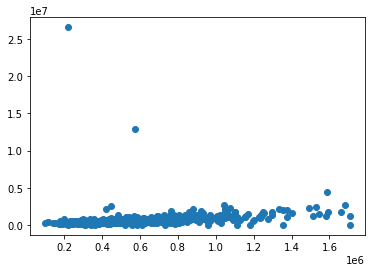

In [11]:
predict=linear_reg.predict(X_test)
plt.scatter(predict, Y_test)
plt.show()


In [12]:
predict.size

920

In [13]:
Y=file.iloc[:,0]
X=file.iloc[:,1:13]
Y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [14]:
pca = PCA()
df_pca= pca.fit_transform(X=X)
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape) 
df_pca.round(2).head()

(4600, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,-6948.25,-1184.63,881.95,-341.64,3.13,-0.04,-0.01,0.31,-0.02,0.13,0.00,0.0
1,-5785.28,2321.48,-212.27,-281.25,76.16,1.46,3.10,-0.71,-0.34,0.42,-0.15,-0.0
2,-2905.72,125.09,-832.38,-309.42,15.20,0.09,-0.24,-0.52,-0.23,-0.46,-0.00,-0.0
3,-6826.59,-286.51,-853.05,982.58,-2.23,0.03,-0.58,-0.16,0.18,-0.21,0.00,0.0
4,-4357.61,-818.20,1043.78,588.69,-27.32,-0.81,0.25,-0.69,0.27,-0.25,0.01,0.0


In [15]:
# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000002,0.000002,0.005658,0.999970,5.804746e-08,4.061527e-08,0.000002,1.001305e-08,0.005206,0.000451,0.000042,-0.000622
1,0.000403,0.000476,0.722505,-0.007575,1.986313e-04,6.618240e-06,0.000150,-3.591000e-05,0.629184,0.093321,0.009305,-0.270667
2,0.000140,0.000045,0.226912,-0.001452,-5.434527e-05,4.275952e-06,0.000102,-1.499137e-04,0.139469,0.087443,-0.006480,0.959880
3,0.000291,0.000142,0.305172,0.000474,-3.661199e-04,1.033519e-05,0.000354,3.328523e-04,-0.501184,0.806356,-0.012817,-0.072863
4,0.000188,-0.006967,0.001343,-0.000025,-4.365346e-03,1.396289e-04,0.002702,1.083139e-02,0.011381,-0.010038,-0.999757,-0.007805


In [16]:
X_mean = X - X.mean()
X_mean.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.40087,-0.660815,-799.346957,-6940.516087,-0.012065,-0.007174,-0.240652,-0.451739,-487.265435,-312.081522,-15.786304,1196.391739
1,1.59913,0.339185,1510.653043,-5802.516087,0.487935,-0.007174,3.759348,1.548261,1542.734565,-32.081522,-49.786304,-808.608261
2,-0.40087,-0.160815,-209.346957,-2905.516087,-0.512065,-0.007174,-0.240652,0.548261,102.734565,-312.081522,-4.786304,-808.608261
3,-0.40087,0.089185,-139.346957,-6822.516087,-0.512065,-0.007174,-0.240652,0.548261,-827.265435,687.918478,-7.786304,-808.608261
4,0.59913,0.339185,-199.346957,-4352.516087,-0.512065,-0.007174,-0.240652,0.548261,-687.265435,487.918478,5.213696,1183.391739


In [17]:
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[1, :])  

-5785.277386143519

In [18]:
print(pca.explained_variance_ratio_.round(2)[:12])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
